<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/hw1_Behnoush_Khavari_pynb.py" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IFT6269 -  Maximum Likelihood Estimation

### Introduction
W
e are going to numerically explore the MLE of the variance parameter of the Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sample_gaussian_data(num_samples, num_trials):
  """
  inputs: 
     num_samples: [int] number of samples to generate for each trial
     num_trials: [int] number of trials
  Returns:
     samples: [num_samples,num_trial] Array of generated samples.
  """
  return np.random.randn(num_samples, num_trials)

In [3]:
def mu_sigma2_mle(samples):
    """
    # TODO 
    Compute Gaussian MLE estimators for the mean and variance 
        Inputs:
             samples: [num_samples, num_trials] Matrix of N(0, 1) iid samples. 
                      It contains num_trials sets, each of these sets containing
                      num_samples samples.
        
        Returns:
             mu_hat: [num_trials] Vector of MLE mean estimators for each trial
             sigma2_hat: [num_trials] Vector of MLE variance estimators for each trial
             
    """
    mean = np.mean(samples , axis = 0)
    var = np.mean( (samples - mean)**2, axis = 0 )
    return mean , var 

In [4]:
def freq_mean_var(x):
    """
    Compute the frequentist mean and variance of a vector of n real numbers 
        Inputs:
             x: [n] Vector of real numbers
        
        Returns:
             (mean, var): [tuple] Frequentist mean and variance of x
             
    """
    mean = np.mean(x)
    var = np.mean((x - mean)**2)
    return (mean , var)


In [5]:
def empirical_frequentist_bias(empirical_mean, true_mean):
    """
    # TODO 
    Estimate the frequentist bias of an estimator given its empirical and true means 
        Inputs:
             true_mean: [float] True mean of the estimator
             empirical_mean: [float] Empirical mean of the estimator
             
        Returns:
             bias: [float] Frequentist bias
            
    """
    return true_mean - empirical_mean


In [6]:
def plot_sigma_hat_histogram(samples, bins=200):
    """
    Plots a histogram of a estimated variances 
        Inputs:
            samples: [array] Estimated variances to be plotted

    """
    plt.xlabel('variance')
    plt.ylabel('counts')
    plt.hist(samples, bins )

In [7]:
#draw  𝑛=5  samples from the standard Gaussian distribution,  N(0,1) .
samples = sample_gaussian_data(5,1)
print(f'Generated Gaussian samples\n{samples}')

Generated Gaussian samples
[[-1.18890842]
 [ 0.62134348]
 [ 0.42917227]
 [-0.98416142]
 [ 0.2704691 ]]


In [8]:
#Compute the ML estimate  𝜇̂  for the mean and  𝜎̂2  for the variance of the Gaussian, as given in Question 3(d).
mean , variance = mu_sigma2_mle(samples)
print(f'MLE of mean is {mean}\nMLE of variance is {variance}') 

MLE of mean is [-0.170417]
MLE of variance is [0.57605545]


In [ ]:
#Repeat the previous steps 10,000 times. Plot a histogram of the 10,000 estimates of the Gaussian variance parameter to show its empirical distribution.
variance_list = []
for iter in range(10000):
  samples = sample_gaussian_data(5 , 1)
  mean , var = mu_sigma2_mle(samples)
  variance_list.append(var)
plot_sigma_hat_histogram(variance_list , bins = 200)

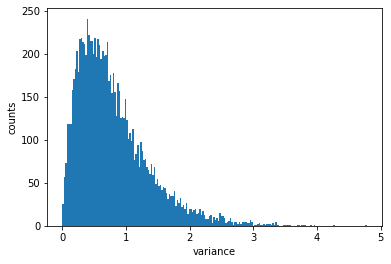

In [9]:
samples  =  sample_gaussian_data(5 , 10000)
mean , var = mu_sigma2_mle(samples)
plot_sigma_hat_histogram(var, bins = 200)

We notice that the shape of this histogram shows the Chi-square distribution as we expected for the sum of squares of standard normal variables.


In [13]:
bias_of_gaussian_variance = 1 - np.mean(var) 
bias_of_gaussian_variance

0.19962312114292557

In [12]:
var_of_gaussian_variance = np.mean((var - np.mean(var))**2)
var_of_gaussian_variance 

0.31670181055821495

In [ ]:
bias_of_gaussian_variance = np.mean(var) - 1

# Use the same 10,000 repeated trials to numerically estimate the (frequentist) bias and variance of the ML estimate  𝜎̂2  of the Gaussian variance parameter.
# Compare the results with the theoretical (frequentist) bias and variance that you can compute from the formula you derived in Question 3(d).
sigma2_hat_mean, sigma2_hat_var = freq_mean_var(sigma2_hat_vec)

TRUE_SIGMA2 = 1.

# In the next lines, fill in the theoretical bias and variance of $\hat{\sigma}^2$
n = NUM_SAMPLES
THEO_BIAS = TRUE_SIGMA2/n
THEO_VAR =  TRUE_SIGMA2**2*(2*n -2)/(n**2)

emp_bias = empirical_frequentist_bias(empirical_mean=sigma2_hat_mean,
                                      true_mean=TRUE_SIGMA2)

print('Theoretical Bias: ', THEO_BIAS, ' Freq. Estimated Bias: ', emp_bias)
print('Theoretical Variance: ', THEO_VAR, ' Freq. Estimated Variance: ', sigma2_hat_var)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [ ]:
def sample_gaussian_data(num_samples, num_trials):
    """
    # TODO 
    Generate num_trials sets of samples of a *standard* 1-d Gaussian random variable.
    Each set of samples contains num_sample samples

        Inputs:
            num_samples: [int] Number of samples to generate per trial
            num_trials: [int] Number of trials to generate
        
        Returns:
            samples: [num_samples, num_trials] Vector of generated samples
    """

    # TODO
    samples = np.transpose(np.random.randn( num_trials, num_samples))

    return samples

def mu_sigma2_mle(samples):
    """
    # TODO 
    Compute Gaussian MLE estimators for the mean and variance 
        Inputs:
             samples: [num_samples, num_trials] Matrix of N(0, 1) iid samples. 
                      It contains num_trials sets, each of these sets containing
                      num_samples samples.
        
        Returns:
             mu_hat: [num_trials] Vector of MLE mean estimators for each trial
             sigma2_hat: [num_trials] Vector of MLE variance estimators for each trial
             
    """
    # Useful dimensions
    num_samples, num_trials = samples.shape

    #TODO
    mu_hat = np.mean(samples,0)
    sigma2_hat = np.var(samples,0)

    return mu_hat, sigma2_hat

def freq_mean_var(x):
    """
    # TODO 
    Compute the frequentist mean and variance of a vector of n real numbers 
        Inputs:
             x: [n] Vector of real numbers
        
        Returns:
             (mean, var): [tuple] Frequentist mean and variance of x
             
    """

    #TODO
    mean, var = np.mean(x), np.mean((x-np.mean(x))**2)

    return mean, var

def empirical_frequentist_bias(empirical_mean, true_mean):
    """
    # TODO 
    Estimate the frequentist bias of an estimator given its empirical and true means 
        Inputs:
             true_mean: [float] True mean of the estimator
             empirical_mean: [float] Empirical mean of the estimator
             
        Returns:
             bias: [float] Frequentist bias
            
    """

    #TODO
    bias = true_mean - empirical_mean

    return bias

def plot_sigma_hat_histogram(samples, bins=200):
    """
    Plots a histogram of a estimated variances 
        Inputs:
            samples: [array] Estimated variances to be plotted

    """
    # Plot histogram with custom bins for readability.
    plt.hist(samples, bins=bins, alpha=0.8, label=r'$\hat{\sigma}$' +' histogram');
    plt.ylabel('Counts')
    plt.xlabel(r'$\hat{\sigma^2}$')
    plt.legend();

## Gaussian Maximum Likelihood Estimation


### Sample generation

Use the functions defined above to draw $n=5$ samples from the standard Gaussian distribution, $\mathcal{N}(0,1)$.

In [ ]:
NUM_SAMPLES = 5

samples = sample_gaussian_data(num_samples=NUM_SAMPLES, num_trials=1)

print('Generated Gaussian samples')
print(samples)

Generated Gaussian samples
[[-0.96748746]
 [ 0.3470422 ]
 [-0.35715657]
 [ 0.97725692]
 [ 0.18628083]]


### MLE computation
Compute the ML estimate $\hat{\mu}$ for the mean and $\hat{\sigma}^2$ for the variance of the Gaussian, as given in Question 3(d). 

In [ ]:
mu_hat, sigma2_hat = mu_sigma2_mle(samples)

print('MLE mean - variance')
print(mu_hat, sigma2_hat)

MLE mean - variance
[0.03718718] [0.43336966]


### MLE computation
Repeat the previous steps 10,000 times.  Plot a histogram of the 10,000 estimates of the Gaussian  variance  parameter  to  show  its  empirical  distribution.

In [ ]:
NUM_TRIALS = int(1e4)
samples = sample_gaussian_data(num_samples=NUM_SAMPLES, num_trials=NUM_TRIALS)
_, sigma2_hat_vec = mu_sigma2_mle(samples)

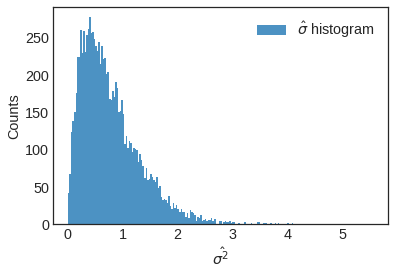

In [ ]:
plot_sigma_hat_histogram(sigma2_hat_vec)

**Question:** Do you recognize the shape of this histogram? What is it? 

**Answer:** 
Chi-square distribution as we expected for the sum of squares of standard normal variables.


### Bias and variance of the *estimator*
Use *the same* 10,000 repeated trials to numerically estimate the (frequentist) bias and variance of the ML estimate $\hat{\sigma}^2$ of the Gaussian variance parameter.

Compare the results with the theoretical (frequentist) bias and variance that you can compute from the formula you derived in Question 3(d). 

*Hint: if your numerical estimates are very far from the theoretical formula, you made a mistake somewhere!*

In [ ]:
sigma2_hat_mean, sigma2_hat_var = freq_mean_var(sigma2_hat_vec)

TRUE_SIGMA2 = 1.

# In the next lines, fill in the theoretical bias and variance of $\hat{\sigma}^2$
n = NUM_SAMPLES
THEO_BIAS = TRUE_SIGMA2/n
THEO_VAR =  TRUE_SIGMA2**2*(2*n -2)/(n**2)

emp_bias = empirical_frequentist_bias(empirical_mean=sigma2_hat_mean,
                                      true_mean=TRUE_SIGMA2)

print('Theoretical Bias: ', THEO_BIAS, ' Freq. Estimated Bias: ', emp_bias)
print('Theoretical Variance: ', THEO_VAR, ' Freq. Estimated Variance: ', sigma2_hat_var)

Theoretical Bias:  0.2  Freq. Estimated Bias:  0.20999156088616533
Theoretical Variance:  0.32  Freq. Estimated Variance:  0.31670584193825585


**Question:** What conclusions can you draw from the result of this comparison?

**Answer:** We see that the numerical result is pretty close to the theoretical one. But it seems that it is a little bit higher that could be a result of intrinsic uncertainty. I don't have more idea on why so!